# 🏦 Loan Status Prediction using Machine Learning

This project builds a machine learning model to predict whether a loan application will be approved or not based on applicant details such as income, credit history, and loan amount. The model uses Support Vector Machine (SVM) for binary classification and evaluates performance using standard metrics.


# Importing the Dependencies

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importing the Dataset

In [111]:
import kagglehub

path = kagglehub.dataset_download("ninzaami/loan-predication")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-predication


In [112]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/loan-predication'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


In [113]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

# Data Analysis

In [114]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [115]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [116]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

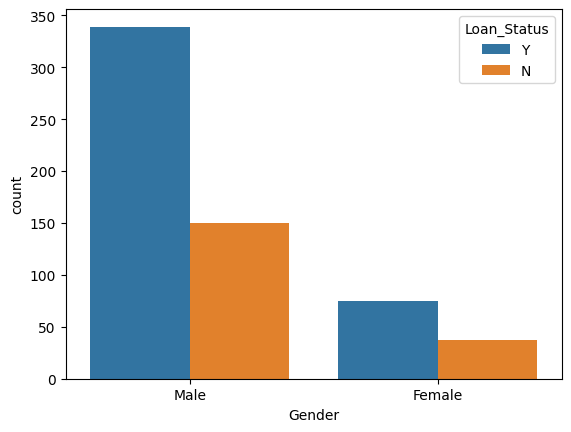

In [117]:
# Gender vs Loan Status
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

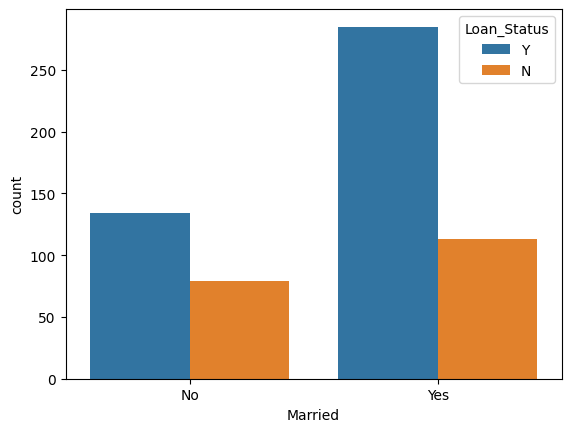

In [118]:
# Married vs Loan Status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

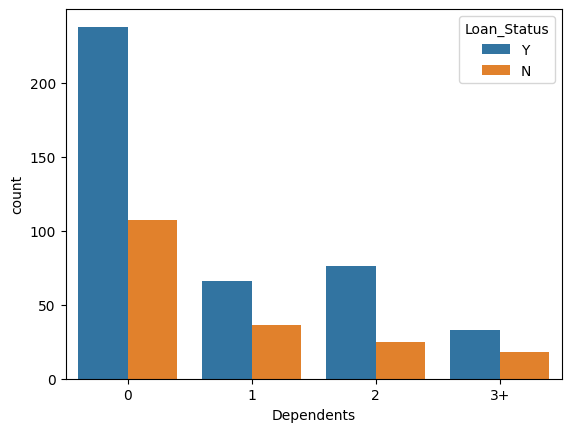

In [119]:
# Dependents vs Loan Status
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = loan_dataset)

# Data Preprocessing

In [120]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [121]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [122]:
loan_dataset.shape

(480, 13)

In [123]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [124]:
# Gender column values
loan_dataset['Gender'].value_counts()

,count
Gender,
Male,394
Female,86


In [125]:
# label encoding
loan_dataset.replace({'Gender':{'Male':0, 'Female':1}}, inplace =True)

<ipython-input-125-736aab86a894>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Gender':{'Male':0, 'Female':1}}, inplace =True)


In [126]:
# Married Column Values
loan_dataset['Married'].value_counts()

,count
Married,
Yes,311
No,169


In [127]:
# level encoding
loan_dataset.replace({'Married':{'Yes':0, 'No':1}}, inplace = True)

<ipython-input-127-c5729cecbd36>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'Yes':0, 'No':1}}, inplace = True)


In [128]:
# Dependent Column Values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [129]:
# Replacing '3+' by 3
loan_dataset.replace({'Dependents':{'3+':3}}, inplace = True)

In [130]:
# Eduction Column Values
loan_dataset['Education'].value_counts()

,count
Education,
Graduate,383
Not Graduate,97


In [131]:
# Level Encoding
loan_dataset.replace({'Education':{'Graduate':0, 'Not Graduate':1}}, inplace = True)

<ipython-input-131-ae640cc24709>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Education':{'Graduate':0, 'Not Graduate':1}}, inplace = True)


In [132]:
# Self Employed column values
loan_dataset['Self_Employed'].value_counts()

,count
Self_Employed,
No,414
Yes,66


In [133]:
# Level Encoding
loan_dataset.replace({'Self_Employed':{'Yes':0,'No':1}}, inplace = True)

<ipython-input-133-631dcce1a413>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Self_Employed':{'Yes':0,'No':1}}, inplace = True)


In [134]:
# Property_Area Column Values
loan_dataset['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


In [135]:
# Level Encoding
loan_dataset.replace({'Property_Area':{'Semiurban':0, 'Urban':1, 'Rural':2}}, inplace = True)

<ipython-input-135-a434c3395067>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Property_Area':{'Semiurban':0, 'Urban':1, 'Rural':2}}, inplace = True)


In [136]:
# Loan_Status Column Values
loan_dataset['Loan_Status'].value_counts()

,count
Loan_Status,
Y,332
N,148


In [137]:
# Level Encoding
loan_dataset.replace({'Loan_Status':{'Y':0, 'N':1}}, inplace = True)

<ipython-input-137-02985efdf3f2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status':{'Y':0, 'N':1}}, inplace = True)


In [138]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,2,1
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,0
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,0
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1,0
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,1,0


In [139]:
loan_dataset.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.352083,0.202083,0.862500,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.891667,0.308333
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.822906,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


# Separating the data and label

In [140]:
X = loan_dataset.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']

In [141]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,2
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1
4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1
5,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,1


In [142]:
Y.head()

,Loan_Status
1,1
2,0
3,0
4,0
5,0


# Data Standardization

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
Standardized_X = scaler.transform(X)

# Train_Test_Split

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(Standardized_X, Y, test_size=0.2, stratify=Y, random_state=2)

In [145]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


# Training the model:

Support Vector Machine Model

In [146]:
from sklearn.model_selection import cross_val_score

# Testing for best Kernel

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for k in kernels:
    model = svm.SVC(kernel=k)
    scores = cross_val_score(model, X_train, Y_train, cv=100)
    print(f'Kernel: {k}, Accuracy: {scores.mean():.4f}')

Kernel: linear, Accuracy: 0.8100
Kernel: rbf, Accuracy: 0.8042
Kernel: poly, Accuracy: 0.7875
Kernel: sigmoid, Accuracy: 0.8000


In [147]:
# Linear Kernel Performs Better
final_model = svm.SVC(kernel = 'linear')

In [148]:
#training the support Vector Macine model
final_model.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation

In [149]:
#Accuracy of training data
X_train_prediction = final_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f'Accuracy of the model on training data is: {training_data_accuracy*100: 0.2f}%')

Accuracy of the model on training data is:  80.99%


In [150]:
#Accuracy of test data
X_test_prediction = final_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f'Accuracy of the model on test data is: {test_data_accuracy*100: 0.2f}%')

Accuracy of the model on test data is:  80.21%


# Making a predictive system

In [191]:
def predictive_system(n):
  input_data = X_test[n].reshape(1, -1)
  prediction = final_model.predict(input_data)
  if prediction == 0:
    print('Yes, the loan should be approved.')
  else:
    print('No, the loan can not be approved.')
  if prediction == Y_test.iloc[n]:
    print('Congratulations! Your model provided accurate result.')
  else:
    print('Warning! The model has made a mistake.')

In [205]:
m = int(input(f'Enter a number between 0 and {Y_test.shape[0]-1}: '))
predictive_system(m)

Enter a number between 0 and 95: 12
Yes, the loan should be approved.
Congratulations! Your model provided accurate result.
